<a href="https://colab.research.google.com/github/czokw1/ml-predict-bank-deposit/blob/master/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Project Description

In [1]:
###Abstract: The data is related to marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will take a bank deposit (variable y).

#### Import libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


####Load Data

In [3]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DS/Project/data/bank-full.csv',sep=';')

In [4]:
dataset.sample(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
44382,37,management,single,tertiary,no,62,yes,no,cellular,2,aug,428,2,272,8,success,yes
10373,58,management,married,primary,no,0,no,no,unknown,12,jun,77,6,-1,0,unknown,no
23242,35,management,single,tertiary,no,362,no,no,cellular,27,aug,256,4,-1,0,unknown,no
35045,30,blue-collar,married,secondary,no,313,yes,yes,cellular,6,may,311,3,364,1,failure,no
24222,58,retired,married,secondary,no,425,yes,yes,cellular,17,nov,100,1,-1,0,unknown,no
41362,53,management,divorced,tertiary,no,6649,yes,no,cellular,31,aug,106,1,55,1,failure,no
5686,35,blue-collar,married,secondary,no,1098,yes,no,unknown,26,may,19,17,-1,0,unknown,no
38726,35,management,married,tertiary,yes,-10,yes,no,cellular,15,may,168,2,364,1,other,no
26313,32,technician,single,secondary,no,137,no,no,cellular,20,nov,302,4,-1,0,unknown,no
1709,31,blue-collar,married,secondary,no,428,yes,no,unknown,9,may,75,1,-1,0,unknown,no


#### Exploratory data analysis

In [5]:
### checking data type of variables
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
### checking if there are any missing values
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
### checking descriptive statistics
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
### Corealation matrix for numerical variables
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,balance,day,duration,campaign,pdays,previous
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00


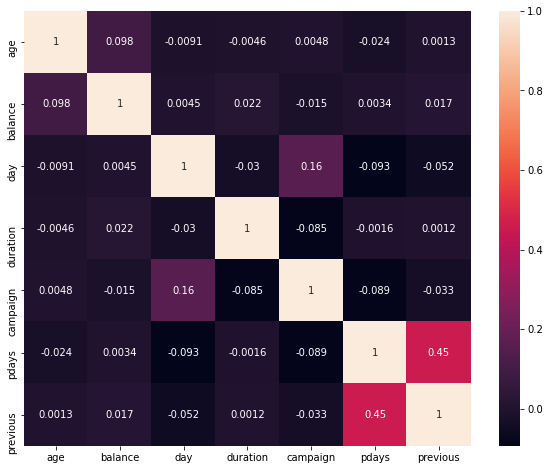

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True);

In [10]:
### target variable y
dataset['y'].value_counts()/dataset.shape[0]

no     0.883015
yes    0.116985
Name: y, dtype: float64

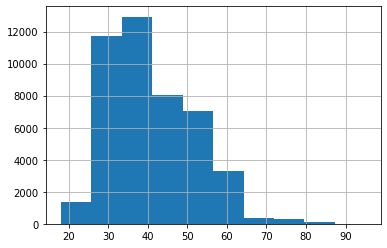

In [11]:
dataset['age'].hist()

In [12]:
np.unique(dataset['y'],return_counts=True)

(array(['no', 'yes'], dtype=object), array([39922,  5289]))

In [13]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [14]:
### Unique values per column
for column in dataset.columns:
  print(f'{column} --> {len(dataset[column].unique())}')
  print(f'{dataset[column].unique()}')
  print()

age --> 77
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

job --> 12
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital --> 3
['married' 'single' 'divorced']

education --> 4
['tertiary' 'secondary' 'unknown' 'primary']

default --> 2
['no' 'yes']

balance --> 7168
[ 2143    29     2 ...  8205 14204 16353]

housing --> 2
['yes' 'no']

loan --> 2
['no' 'yes']

contact --> 3
['unknown' 'cellular' 'telephone']

day --> 31
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]

month --> 12
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

duration --> 1573
[ 261  151   76 ... 1298 1246 1556]

campaign --> 48
[ 1  2  3  5  4  6  7  

In [15]:
### Distributions

numeric_columns =  dataset.select_dtypes(include=np.number).columns

numeric_columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [16]:
non_numeric_columns = dataset.select_dtypes(exclude=np.number).columns

non_numeric_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

Column name: age
Unique values: 77


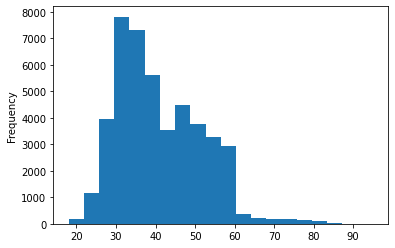

Column name: balance
Unique values: 7168


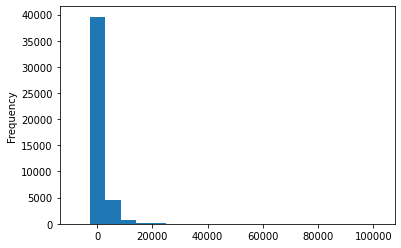

Column name: day
Unique values: 31


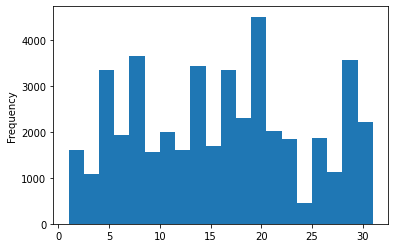

Column name: duration
Unique values: 1573


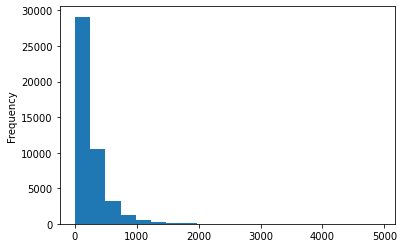

Column name: campaign
Unique values: 48


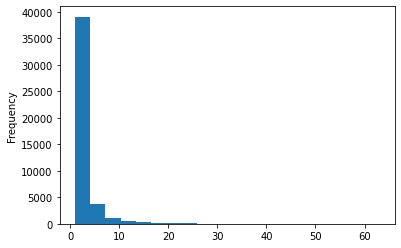

Column name: pdays
Unique values: 559


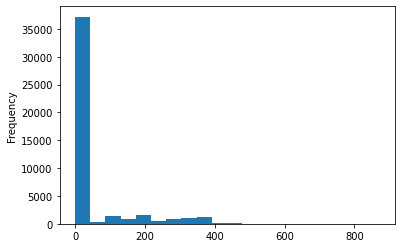

Column name: previous
Unique values: 41


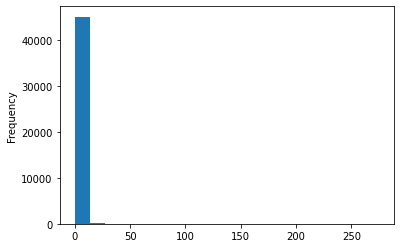

In [17]:
### Numeric columns

for column in numeric_columns:
  print(f'Column name: {column}')
  print(f'Unique values: {len(dataset[column].unique())}')
  dataset[column].plot.hist(bins=20)
  plt.show()

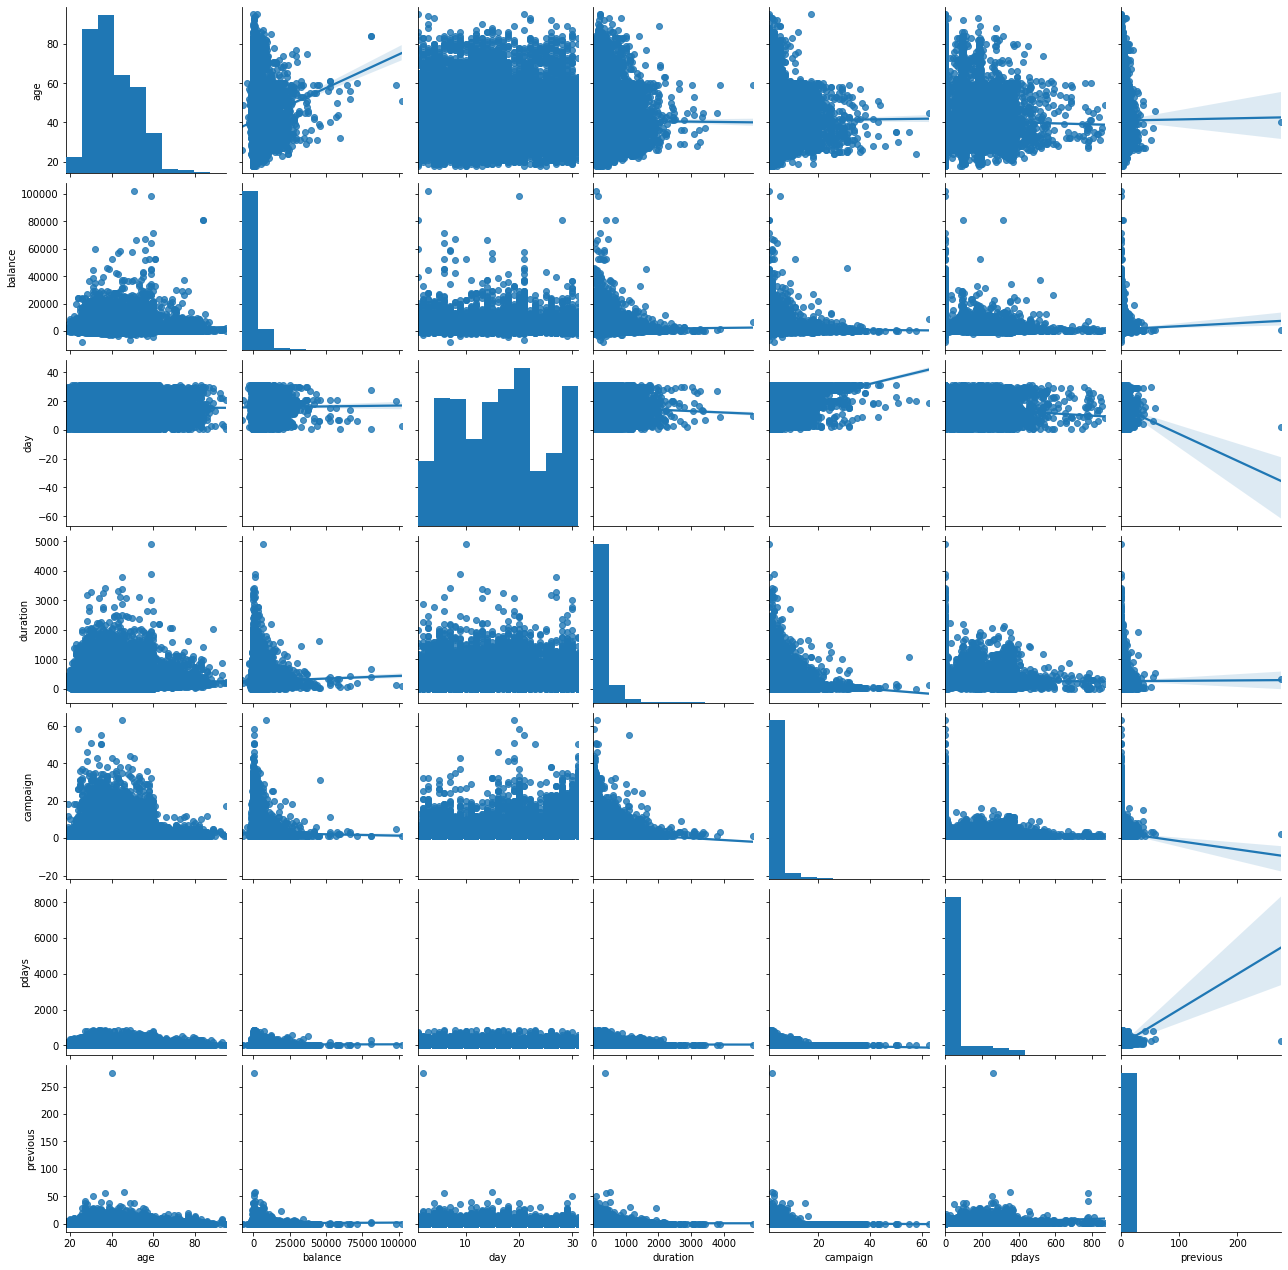

In [18]:
## mutual dependencies

df_numeric = dataset.select_dtypes(include=np.number)

sns.pairplot(data=df_numeric,kind='reg')

plt.show()

Column name: job
Unique values:12


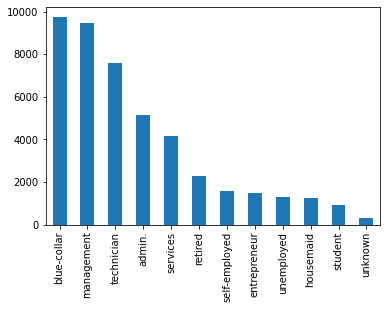

Column name: marital
Unique values:3


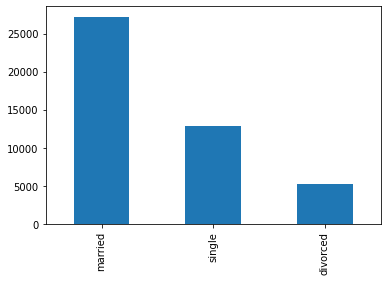

Column name: education
Unique values:4


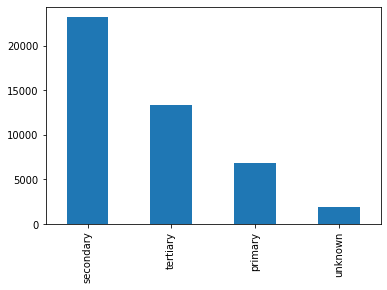

Column name: default
Unique values:2


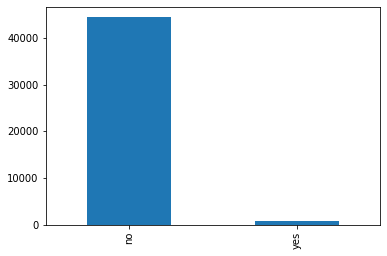

Column name: housing
Unique values:2


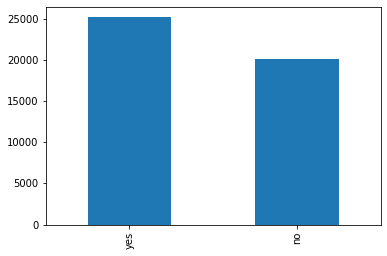

Column name: loan
Unique values:2


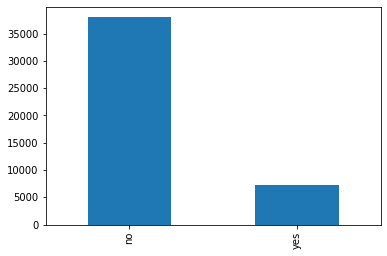

Column name: contact
Unique values:3


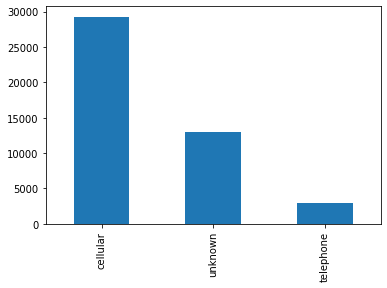

Column name: month
Unique values:12


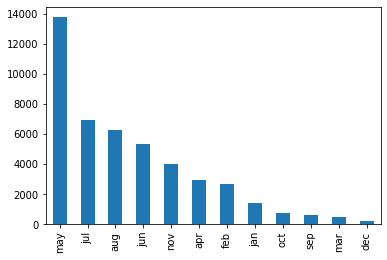

Column name: poutcome
Unique values:4


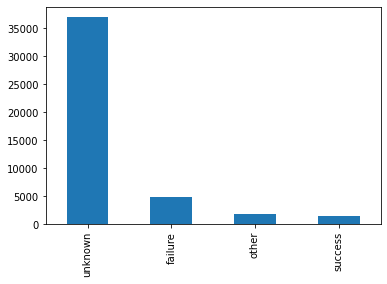

Column name: y
Unique values:2


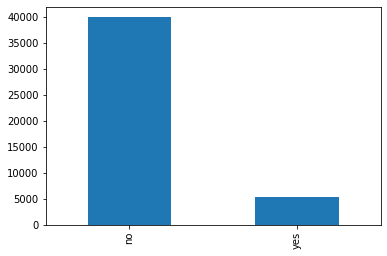

In [27]:
### Categorical columns

for column in non_numeric_columns:
  print(f'Column name: {column}')
  print(f'Unique values:{len(dataset[column].unique())}')
  dataset[column].value_counts().plot.bar()
  plt.show()

In [48]:
dataset[dataset['duration']!=0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Conclusions:
* binary columns such as loan, housing, default should be turned to 0-1
* categorical columns should be encoded using one-hot encoding
* columns that should be removed: pdays, previous, duration, day, month